### Vertical Index calcultation from preprocessed data tables
In this code we will load the data and calculate the vertical index as
VI=V-H/V+H

Names of files used in session are the ones used to load the correspoding preprocessed data

Lets load the data

In [1]:
import pandas as pd 
import numpy as np
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal
import sys
sys.path.append('../')
import commons as cm
from data_curation import Normalization
from pandasql import sqldf
import gaze_commons as gm
from itertools import compress

nm=Normalization()

In [2]:
session_location = Path(r"D:/sessions")
data_path=Path(r"data")
sessions=[]
df_list=[]

with open('session.txt','r') as f:
    for session in f:
            sessions.append(session.replace('\n',''))
f.close()
session_loc_list=[session_location.joinpath(session,'01 Processing_data','pupil_labs') for session in sessions ]

for subject, recording_location in zip(sessions,session_loc_list):
    #Load data in folders
    recording_folder=[record for record in os.listdir(recording_location)  if '00' in record]
    print(recording_folder)
    index_aux = list(map(lambda x: not('_' in x), recording_folder))
    recording_folder=list(compress(recording_folder,index_aux))
    #Load data in folders
    if len(recording_folder)>1:
        ValueError('Ambiguty in folder of experiment')
    recording_location=recording_location.joinpath(recording_folder[0],'exports')
    recording_location_raw=recording_location.joinpath(recording_folder[0],'exports')
    export_folder=[record for record in os.listdir(recording_location)  if '00' in record]
    if len(export_folder)>1:
        ValueError('Ambiguty in folder of exports')
    recording_location=recording_location.joinpath(export_folder[0])

    annotations_csv = os.path.join(recording_location,'annotations.csv')
    annotations_pd = pd.read_csv(annotations_csv) 
    exported_gaze_csv = data_path.joinpath(subject.replace('_PC_EM',"")+'_saccades.csv') 
    gaze_pd_frame = pd.read_csv(exported_gaze_csv)
    print(f'Analiysing session: {subject}, annotations: {annotations_csv}, gaze: {exported_gaze_csv}')

    ## Compute vertical index for each subject
    vertical_index_df=gm.vertical_index(gaze_pd_frame,annotations_pd)
    vertical_index_df.index=[subject]
    df_list.append(vertical_index_df)
vertical_index_concat_df=pd.concat(df_list)
vertical_index_concat_df.to_csv('vi_table.csv')

['002']
Analiysing session: ES0001_S003_PC_EM, annotations: D:\sessions\ES0001_S003_PC_EM\01 Processing_data\pupil_labs\002\exports\002\annotations.csv, gaze: data\ES0001_S003_saccades.csv
['ES0001_S004_Script.txt', '005']
Analiysing session: ES0001_S004_PC_EM, annotations: D:\sessions\ES0001_S004_PC_EM\01 Processing_data\pupil_labs\005\exports\002\annotations.csv, gaze: data\ES0001_S004_saccades.csv
['ES0001_S005_Script.txt', '006']
Analiysing session: ES0001_S005_PC_EM, annotations: D:\sessions\ES0001_S005_PC_EM\01 Processing_data\pupil_labs\006\exports\001\annotations.csv, gaze: data\ES0001_S005_saccades.csv
['007']
Analiysing session: ES0001_S006_PC_EM, annotations: D:\sessions\ES0001_S006_PC_EM\01 Processing_data\pupil_labs\007\exports\000\annotations.csv, gaze: data\ES0001_S006_saccades.csv
['ES0001_S008_Script.txt', '004']
Analiysing session: ES0001_S008_PC_EM, annotations: D:\sessions\ES0001_S008_PC_EM\01 Processing_data\pupil_labs\004\exports\000\annotations.csv, gaze: data\ES

In [3]:
vertical_index_concat_df


,Asset0001,Asset0002,Asset0003,Asset0004,Asset0005,Asset0006,Asset0007,Asset0008,Asset0009,Asset0010,...,Asset0050,Control01,Control02,Control03,Control04,Control05,Surprise01,Surprise02,Surprise03,Surprise04
ES0001_S003_PC_EM,0.200000,-0.111111,0.120000,-0.200000,0.111111,-0.263158,0.111111,0.238095,0.125000,0.157895,...,0.625000,-0.500000,0.333333,0.647059,0.333333,-0.176471,0.684211,0.473684,0.000000,0.428571
ES0001_S004_PC_EM,0.166667,0.153846,0.217391,0.625000,0.478261,0.333333,0.444444,0.904762,0.000000,0.166667,...,0.629630,0.157895,-0.304348,0.500000,0.043478,0.473684,0.185185,0.520000,0.000000,0.785714
ES0001_S005_PC_EM,0.200000,0.238095,0.142857,0.076923,0.238095,0.181818,-0.066667,0.529412,0.578947,-0.473684,...,0.222222,-0.555556,0.294118,0.714286,0.047619,-0.230769,0.529412,0.473684,-0.200000,0.368421
ES0001_S006_PC_EM,0.250000,0.052632,0.130435,0.100000,0.407407,0.250000,0.181818,0.333333,0.600000,-0.047619,...,0.294118,-0.157895,0.222222,0.600000,0.555556,-0.176471,0.500000,0.375000,-0.058824,0.263158
ES0001_S008_PC_EM,0.000000,0.478261,0.090909,0.238095,0.217391,0.333333,0.384615,0.391304,-0.166667,0.440000,...,0.739130,-0.333333,0.250000,0.750000,0.238095,0.363636,0.391304,0.391304,0.272727,0.384615
ES0001_S009_PC_EM,-0.100000,0.000000,0.500000,0.294118,0.444444,0.125000,0.578947,0.529412,0.222222,-0.400000,...,0.263158,0.000000,-0.200000,0.833333,-0.263158,0.300000,0.090909,0.090909,0.000000,0.523810
ES0001_S010_PC_EM,0.238095,-0.333333,-0.090909,0.238095,-0.090909,0.333333,0.181818,-0.263158,-0.400000,-0.100000,...,0.052632,-0.764706,0.000000,0.692308,0.375000,0.000000,0.500000,0.700000,0.000000,0.600000
ES0001_S011_PC_EM,0.083333,0.263158,0.181818,0.333333,0.300000,0.523810,0.181818,0.565217,0.583333,0.000000,...,0.263158,-0.263158,0.222222,0.578947,0.777778,-0.176471,0.142857,0.555556,0.100000,0.583333
ES0001_S012_PC_EM,0.217391,-0.052632,0.157895,0.047619,0.217391,0.000000,-0.111111,0.181818,0.555556,-0.058824,...,0.300000,-0.428571,0.368421,0.555556,0.833333,0.125000,0.428571,0.636364,0.700000,-0.066667
ES0001_S013_PC_EM,0.040000,-0.142857,0.000000,0.250000,0.363636,0.083333,0.636364,0.680000,0.230769,0.000000,...,0.384615,-0.111111,-0.217391,1.000000,-0.523810,-0.037037,0.000000,0.166667,-0.130435,0.545455


<AxesSubplot: >

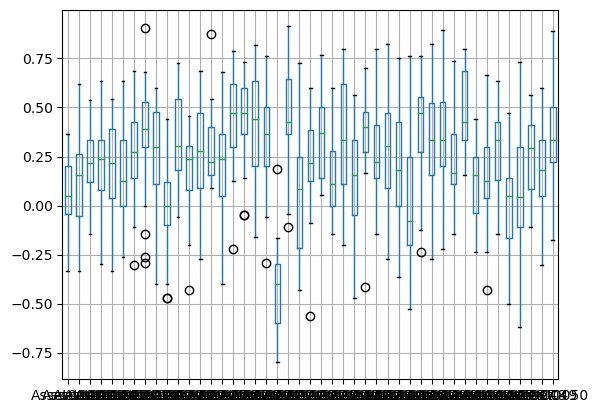

In [7]:
%matplotlib inline

vi=pd.read_csv('vi_table.csv')
vi_df=vi.reindex(vi.columns[vi.columns.str.contains('Asset')],axis=1)
vi_df.boxplot()

<AxesSubplot: >

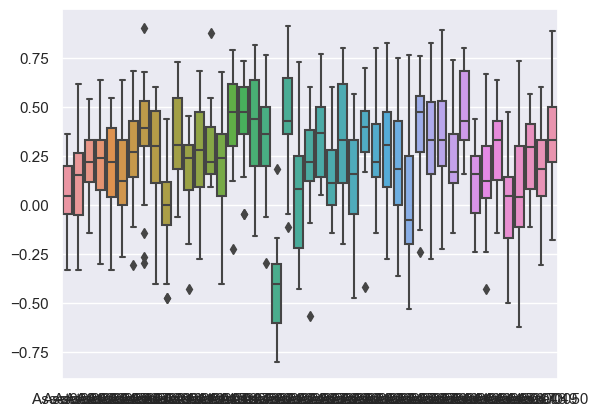

In [9]:
import seaborn as sns
sns.set_theme(style='darkgrid')
ax, fig=plt.subplots(1,)
sns.boxplot(data=vi_df)

c:\Users\Bolo\.conda\envs\bayes\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot: >

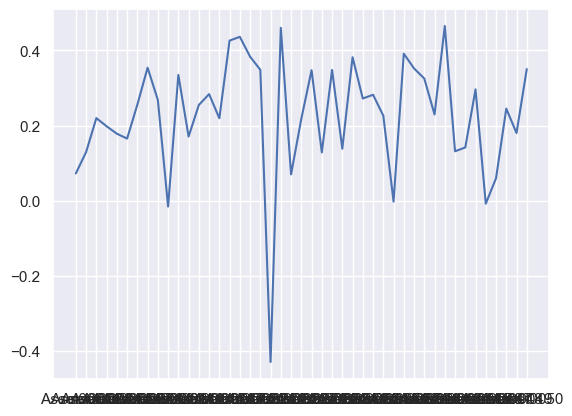

In [15]:
sns.set_theme(style='darkgrid')
ax, fig=plt.subplots(1,)
sns.lineplot(data=np.mean(vi_df))

### Adding chrono tables

In [ ]:
pd.read_csv('')